In [59]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

In [60]:
active_indices = np.array(
    [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    ],
    dtype=bool,
)


class FifthAgentModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(880, 2048)
        self.linear2 = nn.Linear(2048, 2048)
        self.linear3 = nn.Linear(2048, 2048)
        self.linear4 = nn.Linear(2048, 6)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)

        return x


print(active_indices.sum())

176


In [61]:




for i in range(26):
    model_ = FifthAgentModel()
    model_.to(dtype=torch.float32)
    torch.save(model_.state_dict(),f"./models/model{str(i)}.pth")

In [62]:
device = "cuda"
model = FifthAgentModel()
model.to(device)
feat = torch.rand((1,880,),dtype=torch.float32,device=device)

In [63]:
%%timeit
res = model.forward(feat)
torch.cuda.synchronize()



118 μs ± 7.61 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [64]:
device = "cpu"
model = FifthAgentModel()
model.to(device)
feat = torch.rand((1,880,),dtype=torch.float32,device=device)

In [65]:
%%timeit
res = model.forward(feat)
#torch.cuda.synchronize()
#print(res)


1.23 ms ± 26.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# OLD:


cuda:
res = model.forward(torch.rand((100,4,17,17),dtype=torch.float32,device=device))
1.28 ms ± 14 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1000:
9.05 ms ± 39.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10k:
87.7 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
cpu:
27.5 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1000:
235 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10k:
2.39 s ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [66]:
model = FifthAgentModel()
print(params := sum(p.numel() for p in model.parameters()) )
print(forth_params :=59231206)
print(params / forth_params)
model.to(device)
#(list(model.parameters()))

10209286
59231206
0.17236329781973375


FifthAgentModel(
  (linear1): Linear(in_features=880, out_features=2048, bias=True)
  (linear2): Linear(in_features=2048, out_features=2048, bias=True)
  (linear3): Linear(in_features=2048, out_features=2048, bias=True)
  (linear4): Linear(in_features=2048, out_features=6, bias=True)
)

In [68]:
model_map = np.array([1,1,1,2,1,3,1,4,1,5,1,6,1,7,1,8,2,3,2,5,2,7,3,3,3,4,3,5,3,6,3,7,3,8,4,5,4,7,5,5,5,6,5,7,5,8,6,7,7,7,7,8]).reshape((-1,2))
print(model_map)
map = {}
for index,row in enumerate(model_map):
    x,y = row
    map[(y,x)]= index
print(map)

[[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [1 8]
 [2 3]
 [2 5]
 [2 7]
 [3 3]
 [3 4]
 [3 5]
 [3 6]
 [3 7]
 [3 8]
 [4 5]
 [4 7]
 [5 5]
 [5 6]
 [5 7]
 [5 8]
 [6 7]
 [7 7]
 [7 8]]
{(1, 1): 0, (2, 1): 1, (3, 1): 2, (4, 1): 3, (5, 1): 4, (6, 1): 5, (7, 1): 6, (8, 1): 7, (3, 2): 8, (5, 2): 9, (7, 2): 10, (3, 3): 11, (4, 3): 12, (5, 3): 13, (6, 3): 14, (7, 3): 15, (8, 3): 16, (5, 4): 17, (7, 4): 18, (5, 5): 19, (6, 5): 20, (7, 5): 21, (8, 5): 22, (7, 6): 23, (7, 7): 24, (8, 7): 25}


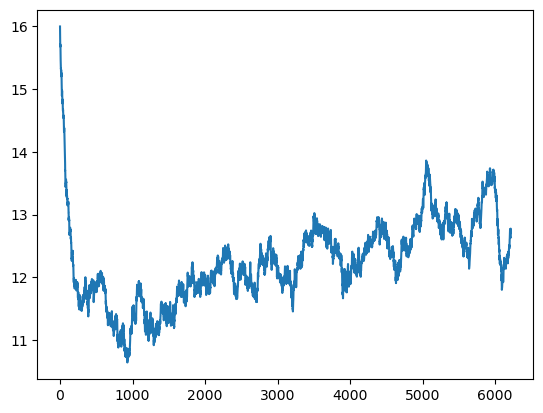

In [67]:
# analyze the loss
# https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
from typing import List


def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

import matplotlib.pyplot as plt
import numpy as np
loss = np.load("2024.09.14-16.30.03/score_history.npy")
plt.figure()
#plt.yscale("log")
plt.plot(smooth(loss,0.99))
#plt.plot(loss)

0


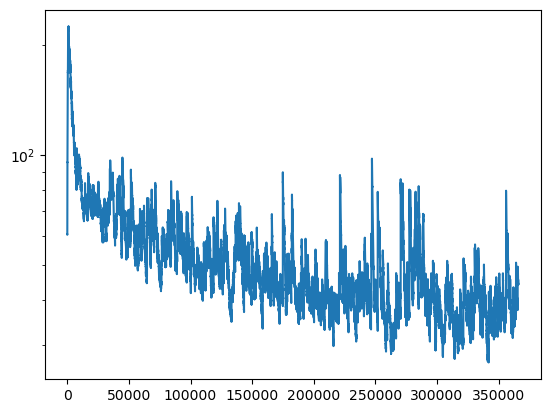

1


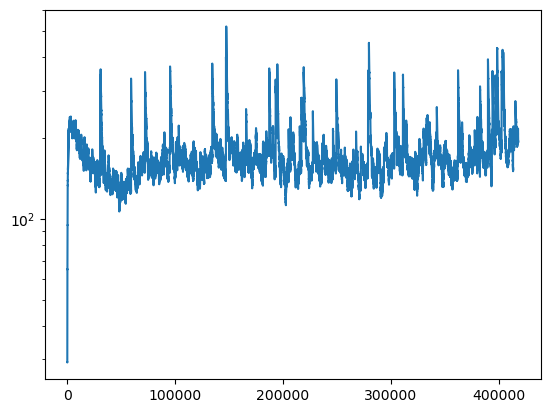

2


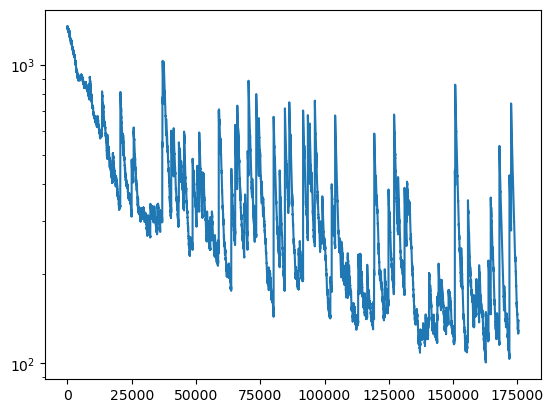

3


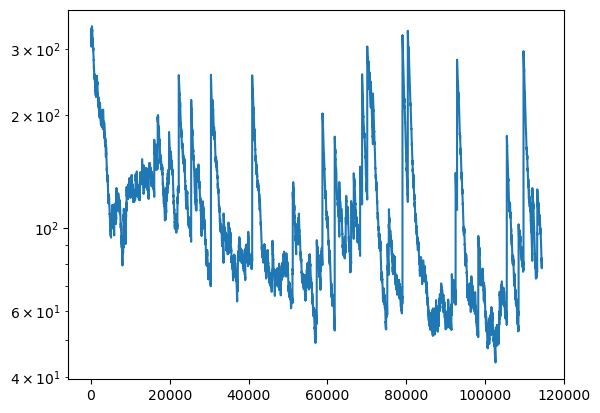

4


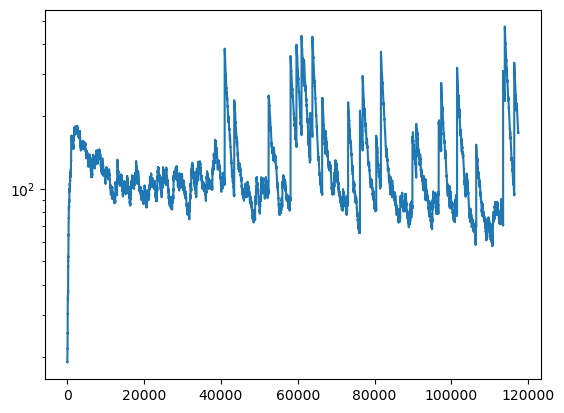

5


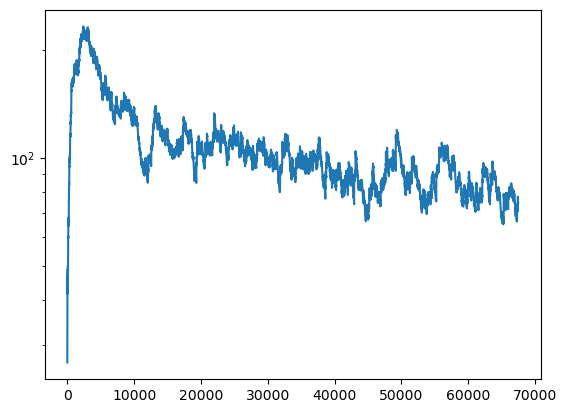

6


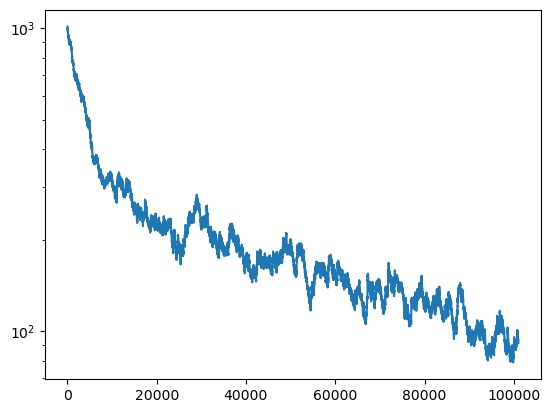

7


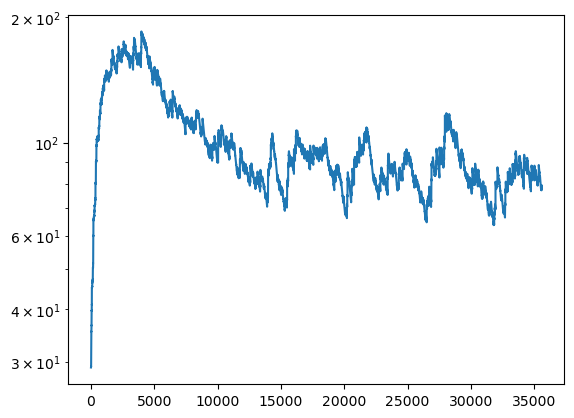

8


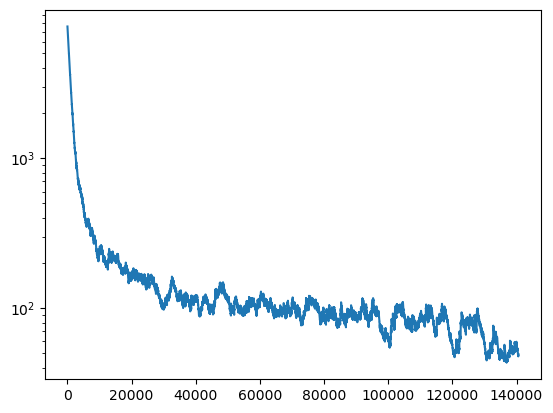

9


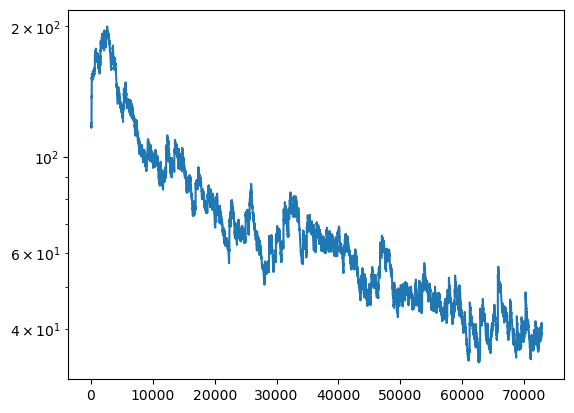

10


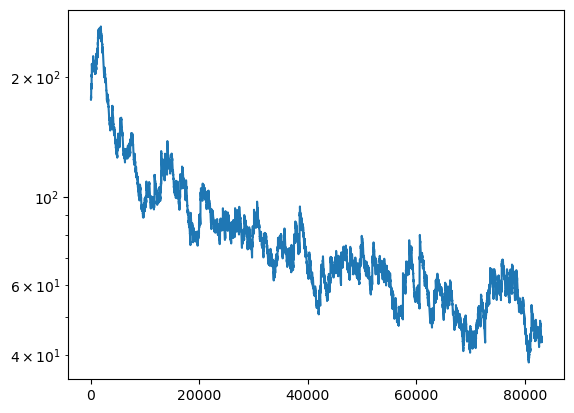

11


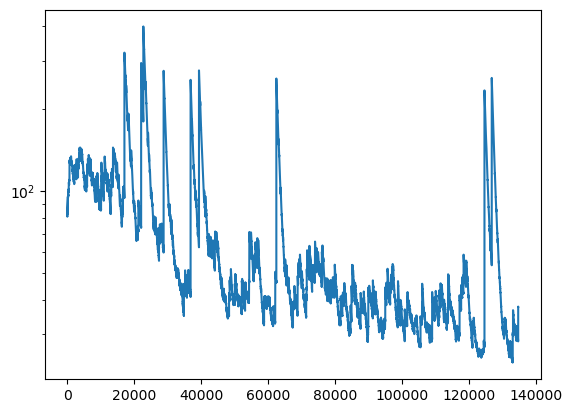

12


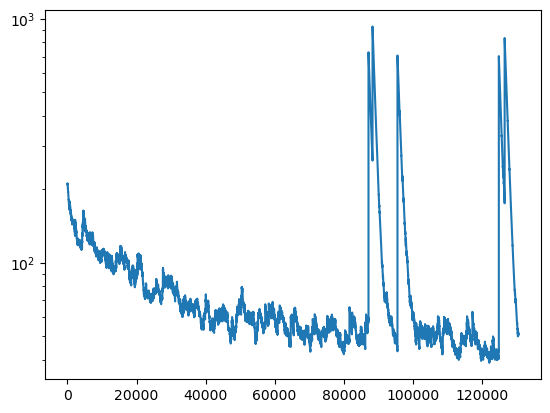

13


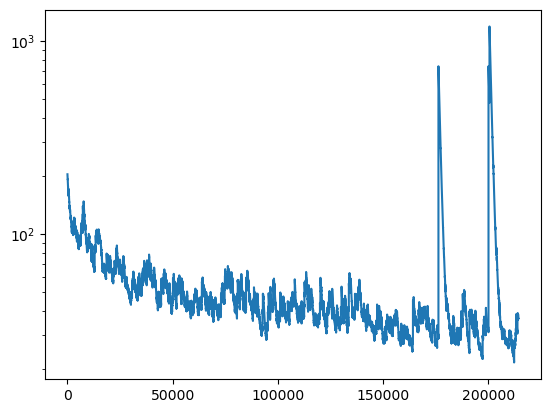

14


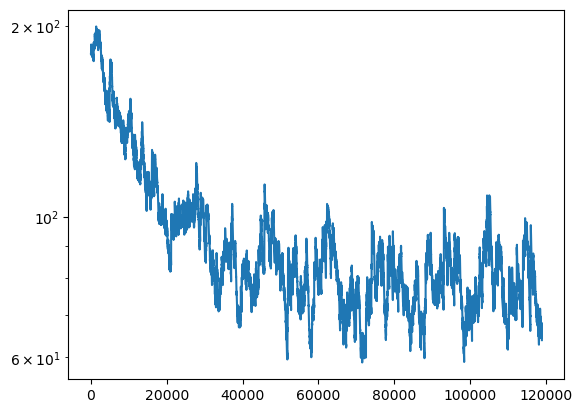

15


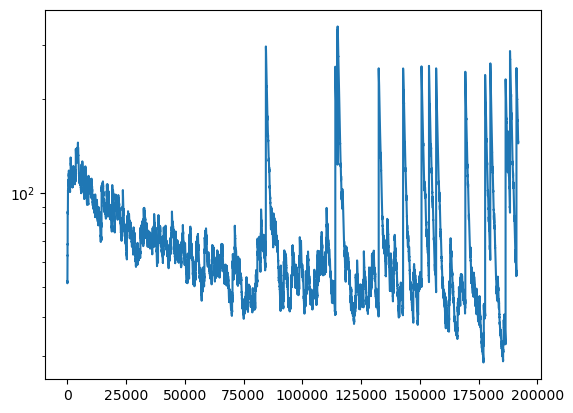

16


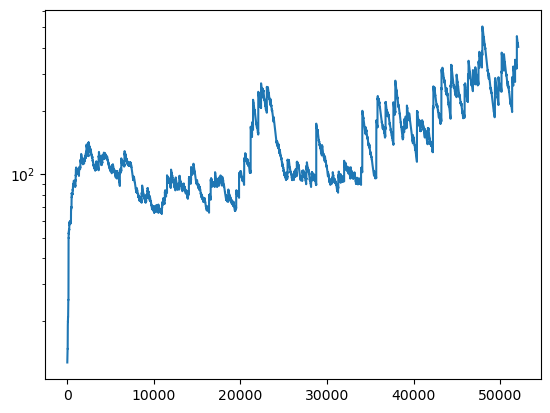

17


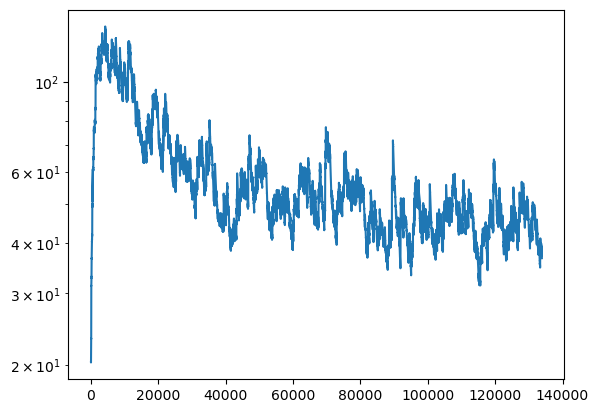

18


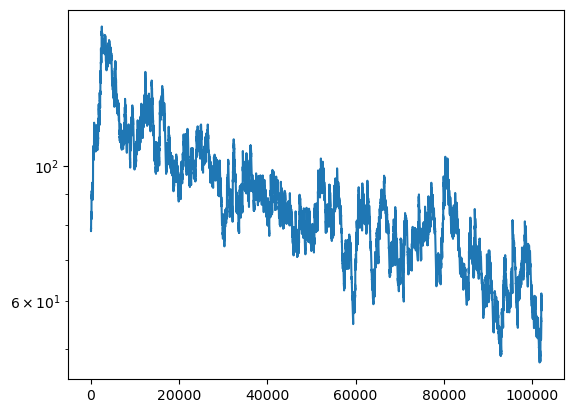

19


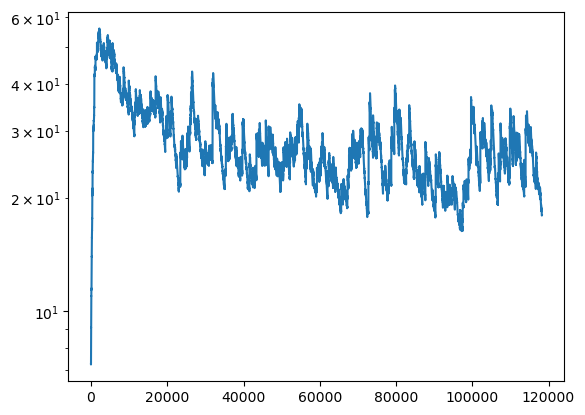

20


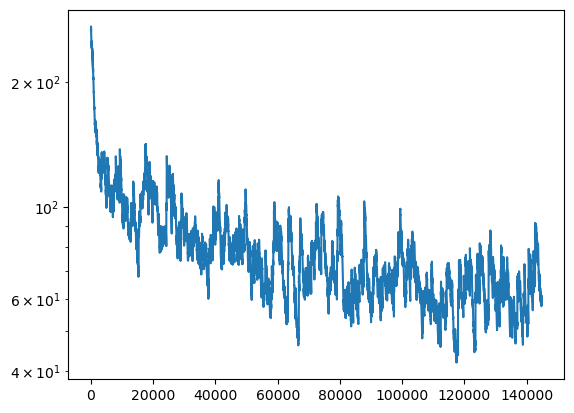

21


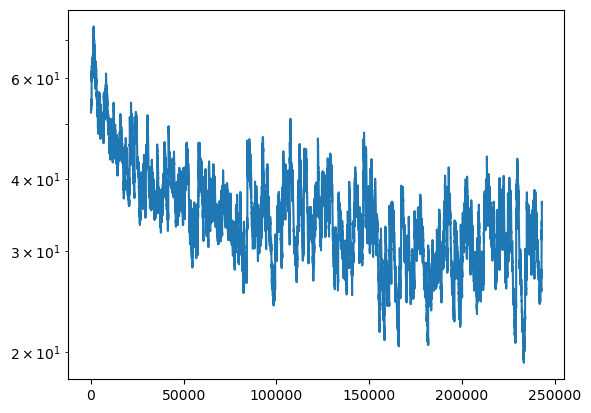

22


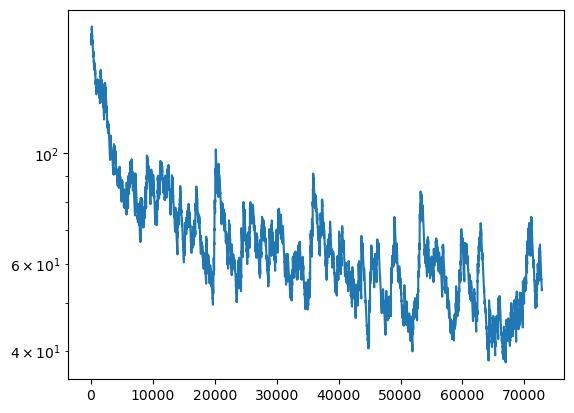

23


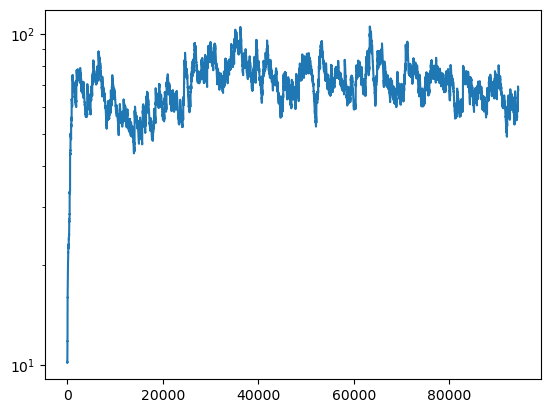

24


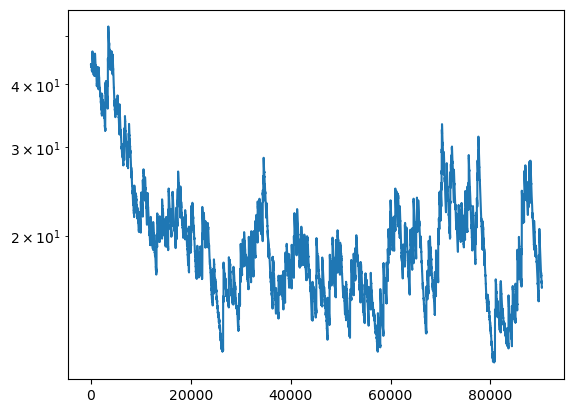

25


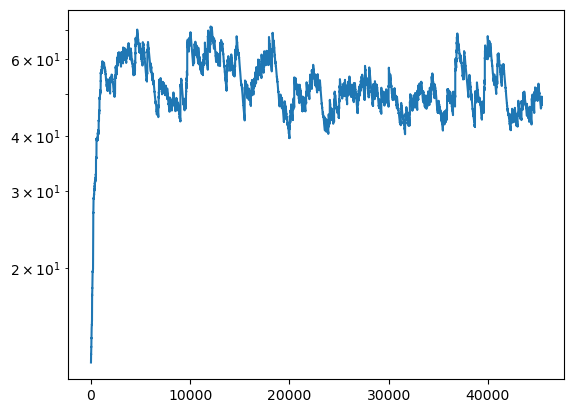

In [2]:

# analyze the loss
# https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
from typing import List


def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

import matplotlib.pyplot as plt
import numpy as np
for i in range(26):
    loss = np.load(f"2024.09.14-13.47.10/loss/loss_history_{i}.npy")
    plt.figure()
    plt.yscale("log")
    print(i)
    plt.plot(smooth(loss,0.999)[100:])
    plt.show()

In [ ]:
class SecondAgentModel(nn.Module):
    active_indices: np.ndarray[int]

    def __init__(self, input_size, output_size: int = 6, p1=0.3, p2=0.3, p_lin=0.3):
        super().__init__()
        self.conv1 = nn.Conv2d(4,64,5,1,"same") # 17x17
        self.pool1 = nn.MaxPool2d(2,2,1) # 8x8
        self.conv2 = nn.Conv2d(64,128,3,1,0) # # 6x6
        self.pool2 = nn.MaxPool2d(2,2,0)  
        self.drop_layer1 = nn.Dropout(p=p1)
        self.drop_layer2 = nn.Dropout(p=p2)
        self.drop_layer_lin = nn.Dropout(p=p_lin)
        self.linear1 = nn.Linear(1152,1024)
        self.linear2 = nn.Linear(1024,512)
        self.linear3 = nn.Linear(512,256)
        self.linear4 = nn.Linear(256,128)
        self.linear5 = nn.Linear(128,64)
        self.linear6 = nn.Linear(64,32)
        self.linear7 = nn.Linear(32,16)
        self.linear8= nn.Linear(16,6)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x= self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        print(x.shape)
        x = x.reshape(-1,1152)
        x = (F.relu(self.linear1(x)))
        x = (F.relu(self.linear2(x)))
        x = (F.relu(self.linear3(x)))
        x = (F.relu(self.linear4(x)))
        x = (F.relu(self.linear5(x)))
        x = (F.relu(self.linear6(x)))
        x = (F.relu(self.linear7(x)))
        x = self.linear8(x)
        return x


In [44]:
def state_to_features_4(game_state: dict | None = None) -> tuple[np.array,bool,bool,bool]:
    """
    *This is not a required function, but an idea to structure your code.*

    Converts the game state to the input of your model, i.e.
    a feature vector.

    You can find out about the state of the game environment via game_state,
    which is a dictionary. Consult 'get_state_for_agent' in environment.py to see
    what it contains.

    :param game_state:  A dictionary describing the current game board.

    :return: np.array (length: 176 *2 + 12 + 8 = 372)
    """
    if game_state is None:
        return None
    x, y = game_state["self"][3]
    transpose=False
    x_flip = False
    y_flip = False

    flip_dims = []
    result = np.zeros((5,17,17),dtype=np.float32)
    for xybomb in game_state["bombs"]:
        # tuple unpacking
        xy, bomb_timer = xybomb
        result[2][xy] = bomb_timer + 1.

    #coins = np.zeros((17, 17),dtype=np.float32)
    for coin_cords in game_state["coins"]:
        result[3][coin_cords] = 1.

    result[4][game_state["self"][3]] = 4 + 1 * game_state["self"][2] # actually use the value

    # it does not matter if the agents are in different orders for each step,
    # as we do not distinguish between them.
    for agent in game_state["others"]:
        result[4][agent[3]] = -4   - (1* agent[2])
    #now apply flips:
    if x > 8:
        flip_dims.append(0)
        x_flip = True
        x = 16 - x
    if y > 8:
        flip_dims.append(1)
        y_flip = True
        y = 16 - y
    if y > x:
        transpose = True
        result[0]=np.flip(game_state["field"],flip_dims).transpose()
        result[1]=np.flip(game_state["explosion_map"],flip_dims).transpose()
        result[2]=np.flip(result[2],flip_dims).transpose()
        result[3]=np.flip(result[3],flip_dims).transpose()
        result[4]=np.flip(result[4],flip_dims).transpose()
    else:
        result[0]=np.flip(game_state["field"],flip_dims)
        result[1]=np.flip(game_state["explosion_map"],flip_dims)
        result[2]=np.flip(result[2],flip_dims)
        result[3]=np.flip(result[3],flip_dims)
        result[4]=np.flip(result[4],flip_dims)

    stacked_channels = torch.from_numpy(result).to(dtype=torch.float32, device=device)
    return (stacked_channels,x_flip,y_flip,transpose)

In [34]:
def state_to_features_3(game_state: dict | None = None) -> tuple[np.array,bool,bool,bool]:
    """
    *This is not a required function, but an idea to structure your code.*

    Converts the game state to the input of your model, i.e.
    a feature vector.

    You can find out about the state of the game environment via game_state,
    which is a dictionary. Consult 'get_state_for_agent' in environment.py to see
    what it contains.

    :param game_state:  A dictionary describing the current game board.

    :return: np.array (length: 176 *2 + 12 + 8 = 372)
    """

    # mutate the state so that the agent will always have x,y <= 8, (is in the top left corner)
    # TODO: in the future, maybe aditionally ensure that x>=y, to exploit even more symetry.

    x, y = game_state["self"][3]
    transpose=False
    x_flip = False
    y_flip = False
    # these values get checked later

    # This is the dict before the game begins and after it ends
    if game_state is None:
        return None

    # For example, you could construct several channels of equal shape, ...

    # field and explosion are numpy, others are torch
    field: np.ndarray = game_state["field"]  # TODO: check if modifying this is allowed or copy is needed
    coins = torch.full((17, 17), 0)
    for coin_cords in game_state["coins"]:
        coins[coin_cords] = 1

    explosion_copy: np.ndarray = game_state["explosion_map"]

    bombs = torch.full((17, 17), 0)
    for xybomb in game_state["bombs"]:
        # tuple unpacking
        xy, bomb_timer = xybomb
        bombs[xy] = bomb_timer + 1

    # now pass position of each agent (we, enemy 1, 2,3)
    #agent_positions = torch.full((17, 17), 0)
    # our agent:
    # 5 if can place a bomb, 1 if not
    our_agent_encode = 3+ 2 * game_state["self"][2] # 1 if bomb not possible, 5 if possible
    field[game_state["self"][3]] = our_agent_encode # actually use the value

    # it does not matter if the agents are in different orders for each step,
    # as we do not distinguish between them.
    for agent in game_state["others"]:
        field[agent[3]] = -3   - (2 * agent[2])

    #now apply flips:
    if x > 8:
        x_flip = True
        x = 16 - x
        field = np.flipud(field)
        explosion_copy = np.flipud(explosion_copy)
        coins= torch.flipud(coins)
        bombs=torch.flipud(bombs)

    if y > 8:
        y_flip = True
        y = 16 - y
        field = np.fliplr(field)
        explosion_copy = np.fliplr(explosion_copy)
        coins = torch.fliplr(coins)
        bombs = torch.fliplr(bombs)
    
    if y > x:
        transpose = True
        field = field.T
        explosion_copy = explosion_copy.T
        coins = coins.T
        bombs = bombs.T

    channels = [
        torch.tensor(field.copy(), dtype=torch.float32), # contains, walls, crates, spaces, players
        coins,
        torch.tensor(explosion_copy.copy()),
        bombs,
    ]

    # concatenate them as a feature tensor (they must have the same shape), ...
    stacked_channels = torch.stack(channels).to(dtype=torch.float32, device=device)
    # and return them as a vector
    return (stacked_channels,x_flip,y_flip,transpose)


In [35]:
gs = {
    "round": 1,
    "step": 7,
    "field": np.array(
        [
            [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [-1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, -1],
            [-1, 0, -1, 1, -1, 1, -1, 1, -1, 0, -1, 1, -1, 1, -1, 0, -1],
            [-1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, -1],
            [-1, 1, -1, 1, -1, 0, -1, 0, -1, 1, -1, 0, -1, 0, -1, 1, -1],
            [-1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, -1],
            [-1, 1, -1, 1, -1, 1, -1, 1, -1, 0, -1, 1, -1, 0, -1, 1, -1],
            [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, -1],
            [-1, 1, -1, 1, -1, 1, -1, 0, -1, 1, -1, 0, -1, 0, -1, 0, -1],
            [-1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, -1],
            [-1, 1, -1, 1, -1, 1, -1, 0, -1, 1, -1, 1, -1, 1, -1, 1, -1],
            [-1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, -1],
            [-1, 0, -1, 0, -1, 0, -1, 1, -1, 1, -1, 1, -1, 1, -1, 0, -1],
            [-1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, -1],
            [-1, 0, -1, 1, -1, 1, -1, 1, -1, 0, -1, 1, -1, 1, -1, 0, -1],
            [-1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, -1],
            [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        ]
    ),
    "self": ("rule_based_agent_0", 0, False, (2, 15)),
    "others": [
        ("rule_based_agent_1", 0, False, (2, 1)),
        ("rule_based_agent_2", 0, False, (15, 4)),
        ("rule_based_agent_3", 0, False, (15, 14)),
    ],
    "bombs": [((1, 3), 0)],
    "coins": [(3,4)], # this is an edit, idk if possible
    "user_input": None,
    "explosion_map": np.array(
        [
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        ]
    ),
}


In [ ]:
%%timeit
feat = state_to_features_3(gs)

In [ ]:
%%timeit
feat = state_to_features_4(gs)

In [ ]:
%%timeit
feat = state_to_features_4(gs)

In [29]:
state = np.array(
        [
            [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [-1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, -1],
            [-1, 0, -1, 1, -1, 1, -1, 0, -1, 1, -1, 1, -1, 1, -1, 0, -1],
            [-1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, -1],
            [-1, 0, -1, 1, -1, 0, -1, 1, -1, 0, -1, 0, -1, 1, -1, 1, -1],
            [-1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, -1],
            [-1, 1, -1, 1, -1, 1, -1, 1, -1, 0, -1, 1, -1, 0, -1, 1, -1],
            [-1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, -1],
            [-1, 0, -1, 0, -1, 0, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1],
            [-1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, -1],
            [-1, 1, -1, 1, -1, 1, -1, 0, -1, 0, -1, 1, -1, 1, -1, 1, -1],
            [-1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, -1],
            [-1, 1, -1, 1, -1, 0, -1, 1, -1, 1, -1, 0, -1, 1, -1, 1, -1],
            [-1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, -1],
            [-1, 0, -1, 1, -1, 1, -1, 0, -1, 1, -1, 1, -1, 1, -1, 0, -1],
            [-1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, -1],
            [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        ]
    )

In [ ]:
state[active_indices]